In [1]:
# basic analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
np.random.seed(7)

In [2]:
# Load data
df = pd.read_csv('/Users/billqiu/bootcamp_Zhiang_Qiu/project/data/raw/api_source-alpha_symbol-MSFT_20250820-142556.csv')

In [3]:
# Create features
df['ret'] = df['adj_close'].pct_change().fillna(0.0)
df['ma_20'] = df['adj_close'].rolling(20).mean()
df['volatility'] = df['ret'].rolling(21).std()

In [4]:
# Make a prediction column which shows whether the next day's return is positive
df.loc[:,"pred"] = (df["ret"].shift(-1) > 0).astype(int)
df = df.dropna()

In [5]:
# # Apply the features
# X = df[['ma_20','volatility']]
# Y = df['pred']
#
# # Train Test Split
# X_train, X_test, y_train, y_test = train_test_split(X, Y)
# rand_frst_clf = RandomForestClassifier(n_estimators = 200)
#
# # Fit
# rand_frst_clf.fit(X_train, y_train)
#
# # Predict
# y_pred = rand_frst_clf.predict(X_test)

In [9]:
import sys
sys.path.append("/Users/billqiu/bootcamp_Zhiang_Qiu/project/src/utils.py")

from utils.py import train_random_forest
model, X_test, y_test, y_pred = train_random_forest(df, feature_cols=['ma_20', 'volatility'], target_col='pred', n_estimators=200)

ModuleNotFoundError: No module named 'utils'

In [40]:
model, X_test, y_test, y_pred = train_random_forest(df, feature_cols=['ma_20', 'volatility'], target_col='pred', n_estimators=200)

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         6
           1       0.73      0.57      0.64        14

    accuracy                           0.55        20
   macro avg       0.53      0.54      0.52        20
weighted avg       0.61      0.55      0.57        20



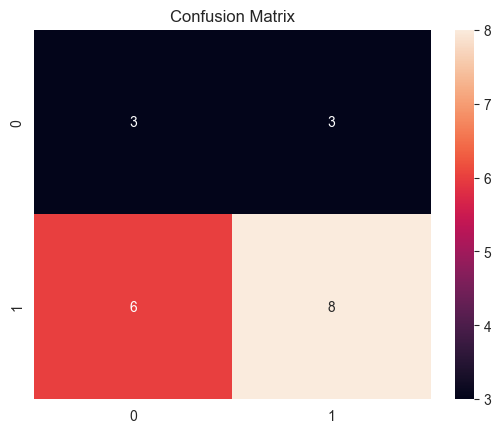

In [41]:
# Visualization
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d'); plt.title('Confusion Matrix'); plt.show()

In [36]:
print("Basic analysis complete.")

Basic analysis complete.


In [37]:
print("Notebook cleaned and ready for handoff.")

Notebook cleaned and ready for handoff.
